# Introduction

Pricing is a significant concern for businesses, particularly in industries with high competition such as Smart Phone Industry.Pricing a smart phone is very critical as it determines the market position and consumer expectations. Understanding the factors that contribute to how a smartphone is priced and being able to predict it can greatly benefit businesses in strategic planning, such as targeted market segmentation,competitive positioning  and Profitability

This project aims to address the challenge of Pricing prediction by analyzing a real-world Smart Phone Price dataset. Using machine learning techniques, the goal is to build a predictive model that can identify and predict the price of new models brought into the market. This will help businesses optimize pricing strategies, improve market positioning,and enhance decision making processes. The code in this repository provides a detailed approach to data exploration, feature engineering, model selection, and evaluation to achieve accurate price prediction

# Problem Statement

The goal is to analyze a telecommunications dataset and create a machine learning model that can accurately predict customer churn. Churn refers to the phenomenon where customers leave or discontinue a service. Predicting customer churn is crucial for businesses to identify at-risk customers and take proactive measures to retain them. By developing a robust predictive model, we aim to assist businesses in reducing customer churn and improving customer retention.

The dataset source is (https://www.kaggle.com/datasets/juanmerinobermejo/smartphones-price-dataset?resource=download)

# Data Loading and Cleaning

In [12]:

import pandas as pd

# Load the data
data = pd.read_csv('/content/archive (1).zip')

# Display basic information about the data
print(data.info())
print(data.head())
print(data.describe(include='all'))


### Step 2: Data Cleaning

#python
# Check for missing values
print(data.isnull().sum())

# Handle missing values
data['RAM'].fillna(data['RAM'].median(), inplace=True)
data['Storage'].fillna(data['Storage'].median(), inplace=True)

# Convert columns to appropriate data types if necessary
# For example, if 'Final Price' is an object, convert it to float
data['Final Price'] = data['Final Price'].astype(float)

# Verify changes
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB
None
                                     Smartphone     Brand           Model  \
0            Realme C55 8/256GB Sunshower Libre    Realme             C55   
1      Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung      Galaxy M23   
2  Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola        Moto G13   
3      Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi  Redmi Note 11S   
4       Nothing Phone (2) 12/5

#Exploratory Data Analysis

Perform Exploratory Data Analysis to gain insights into the data distribution and relationships between variables.

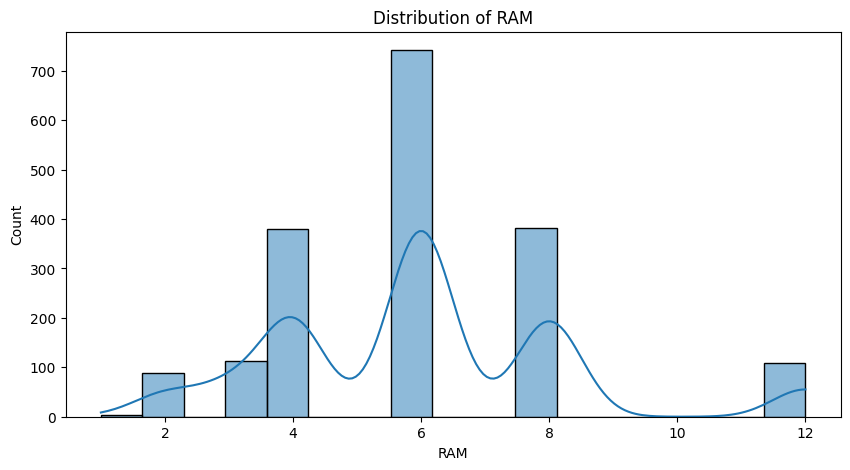

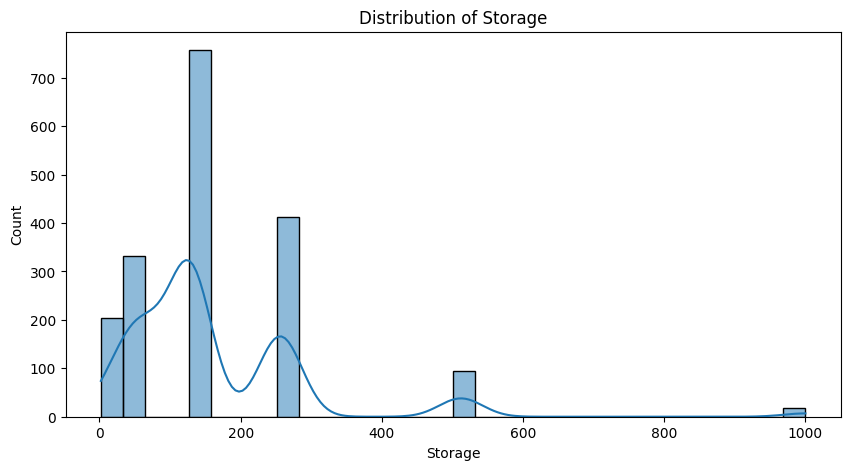

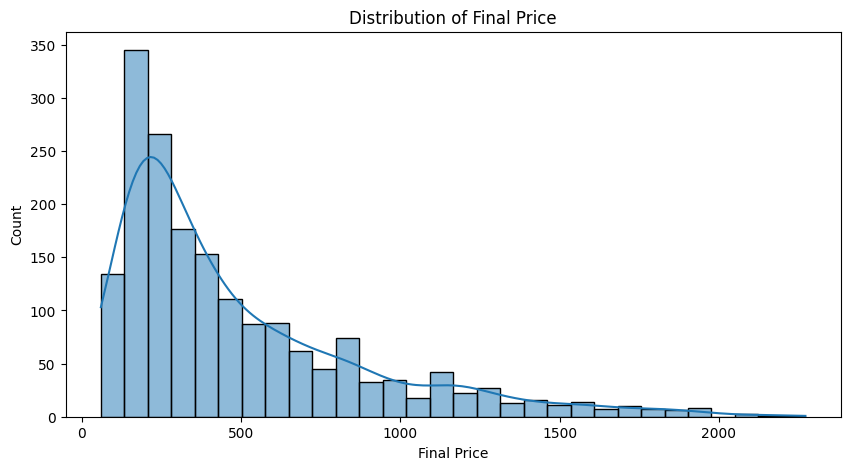

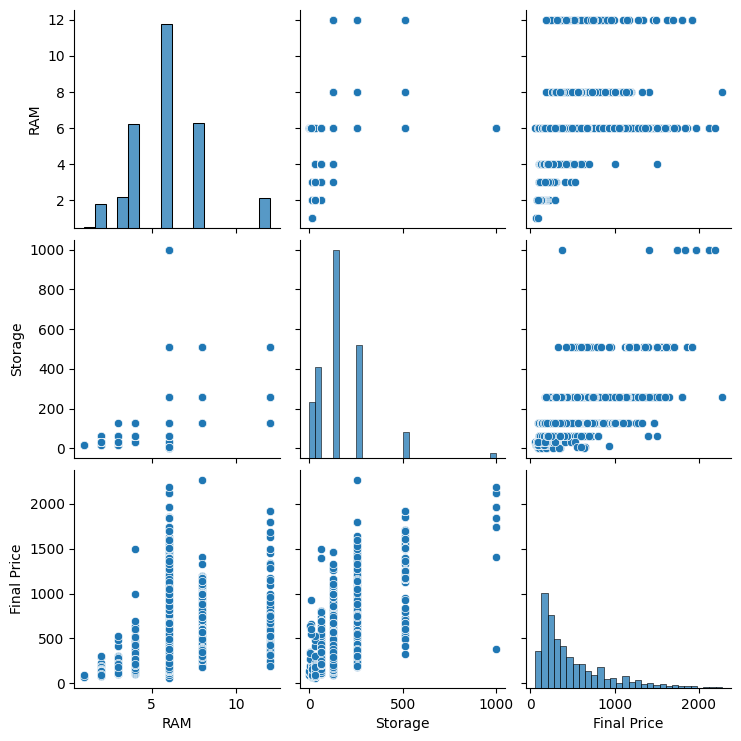

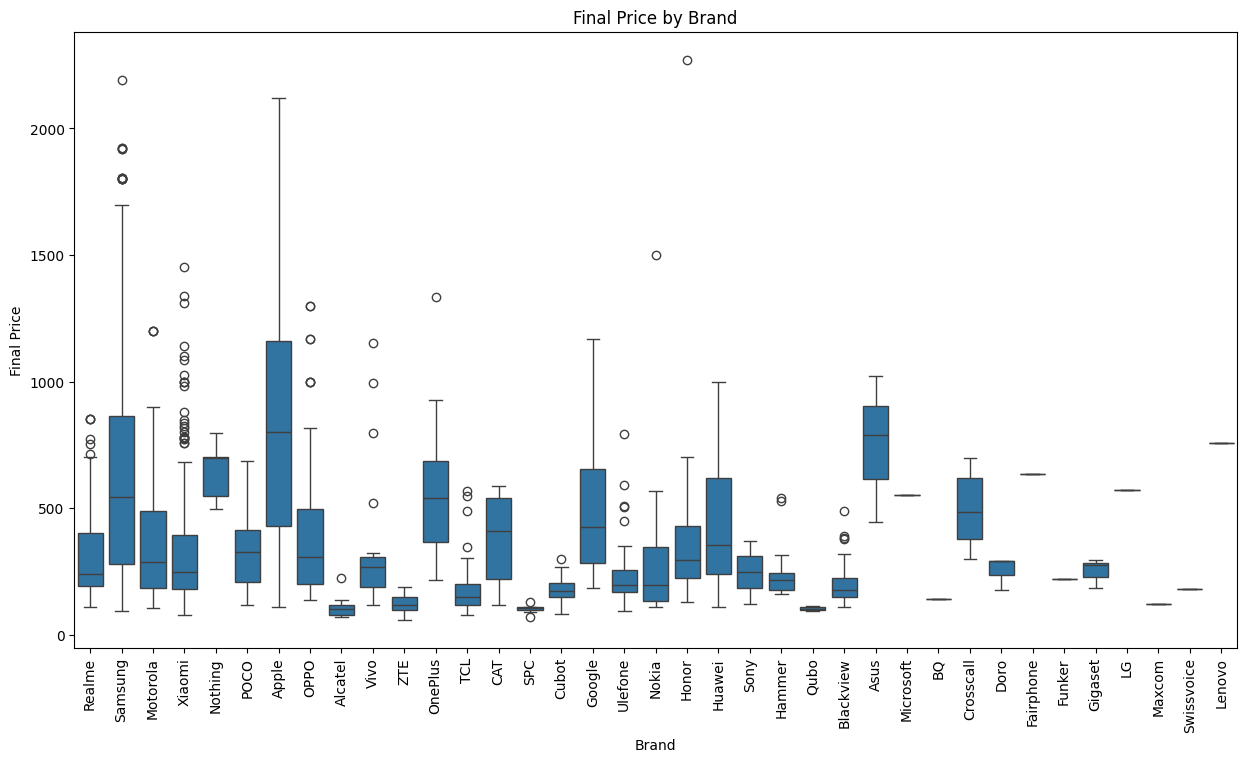

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numeric features
numeric_features = ['RAM', 'Storage', 'Final Price']
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Relationship between RAM, Storage, and Final Price
sns.pairplot(data[numeric_features])
plt.show()

# Boxplot of Final Price by Brand
plt.figure(figsize=(15, 8))
sns.boxplot(x='Brand', y='Final Price', data=data)
plt.xticks(rotation=90)
plt.title('Final Price by Brand')
plt.show()




From the above analysis:

# Distribution of numeric features

We note that 6GB RAM is most common across all brands

1.  We note that 6GB RAM is most common across all brands

2.   We also note that most brands have a storage between 0-400gb
3. Most smartphone prices range between 0-500


# Relationship between RAM, Storage, and Final Price

1. Final Price Vs RAM : There is a positive correlation between the RAM and Final Price. As the RAM increases the Final price also increases.
2. Final Price Vs Storage: there is a positive correlation where higher storage capacity leads to an increased final price.

3. Final Price. We find that the most products are clustered in lower range prices with a few having higher prices.

4. Storage Vs RAM : There is a positive correlation between Storage and Ram

5. Storage: Most products have lower range storage of 500gb and below

6. Storage Vs Final Price: There is a positive correlation the more storage the phone has the higher the price.

7. RAM: Most devices have an average RAM of 5gb

8. RAM Vs Storage : There is generally a positive correlation however, we need observe the data more because of the few outliers

9. RAM vs Final Price: There is a positive correlation between RAM and Final Price.

##Box plot of Final Price by Brand

1.Apple has a higher median price compared to other brands
2. Brands like Realme and Xiaomi have lower median prices but also show several high-priced outliers.
3. Samsung shows a wide IQR, indicating a diverse range of phone prices within the brand
4. The presence of outliers for several brands suggests that while they may generally offer phones within certain price ranges, there are exceptions that significantly deviate from their typical pricing.
5. Most of the Other brands fall within specific price ranges.
6. The presence of outliers for several brands suggests exceptions to their typical pricing strategies.
7. Some brands offer phones at significantly higher or lower prices than their median values.


# Data Processing and Model Evaluation

Preparing the data for modeling, including encoding categorical variables and splitting the dataset.


In [15]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target
X = data.drop(columns=['Smartphone', 'Final Price', 'Free'])
y = data['Final Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['RAM', 'Storage']
categorical_features = ['Brand', 'Model', 'Color']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)




#Feature Engineering

Create new features or modify existing ones to improve model performance.

In [16]:

# Example: Create a feature indicating the price per GB of storage
data['Price_per_GB'] = data['Final Price'] / data['Storage']
print(data.head())



                                     Smartphone     Brand           Model  \
0            Realme C55 8/256GB Sunshower Libre    Realme             C55   
1      Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung      Galaxy M23   
2  Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola        Moto G13   
3      Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi  Redmi Note 11S   
4       Nothing Phone (2) 12/512GB Blanco Libre   Nothing       Phone (2)   

    RAM  Storage   Color Free  Final Price  Price_per_GB  
0   8.0    256.0  Yellow  Yes       231.60      0.904687  
1   4.0    128.0    Blue  Yes       279.00      2.179688  
2   4.0    128.0    Blue  Yes       179.01      1.398516  
3   6.0    128.0    Gray  Yes       279.99      2.187422  
4  12.0    512.0   White  Yes       799.00      1.560547  


##Modelling

Train and evaluate Linear Regression, Random Forest Regressor, Decision Tree Regressor, and Support Vector Regressor.


In [17]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Cross-validation and performance
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} - CV MSE: {-cv_scores.mean()}")

# Train the models on the entire training set
for name, model in models.items():
    model.fit(X_train, y_train)




Linear Regression - CV MSE: 39469.36009832196
Random Forest - CV MSE: 28872.00887489575
Decision Tree - CV MSE: 38940.4849936718
Support Vector Regressor - CV MSE: 152504.4945035247


We are utilizing four distinct models, each built on a unique algorithm. The top-performing model among the four will be selected for further evaluation.


##Evaluation

Evaluate the models on the test set and interpret the results.


In [11]:

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Test MSE: {mse}")
    print(f"{name} - Test R2: {r2}")



Linear Regression - Test MSE: 36571.62348897191
Linear Regression - Test R2: 0.8057888201928294
Random Forest - Test MSE: 39629.68482283412
Random Forest - Test R2: 0.7895491883987648
Decision Tree - Test MSE: 45282.210246859126
Decision Tree - Test R2: 0.7595318272110406
Support Vector Regressor - Test MSE: 194768.3316720756
Support Vector Regressor - Test R2: -0.03430430138040008


1. Linear Regression:

Test MSE: 36571.62
Test R²: 0.806
Interpretation: Linear Regression performs well, with a relatively low MSE and a high R², indicating that it explains about 80.6% of the variance in the target variable.

2. Random Forest:

Test MSE: 39629.68
Test R²: 0.790
Interpretation: Random Forest also performs well but slightly worse than Linear Regression, with a higher MSE and a slightly lower R², explaining about 79.0% of the variance.

3. Decision Tree:

Test MSE: 45282.21
Test R²: 0.760
Interpretation: Decision Tree performs worse than both Linear Regression and Random Forest, with a higher MSE and a lower R², explaining about 76.0% of the variance.

4. Support Vector Regressor (SVR):

Test MSE: 194768.33
Test R²: -0.034
Interpretation: SVR performs the worst among the models, with a very high MSE and a negative R². The negative R² indicates that SVR performs worse than simply predicting the mean of the target values, suggesting a poor fit to the data.

## Reporting

Summarize findings and create visualizations to present the results.


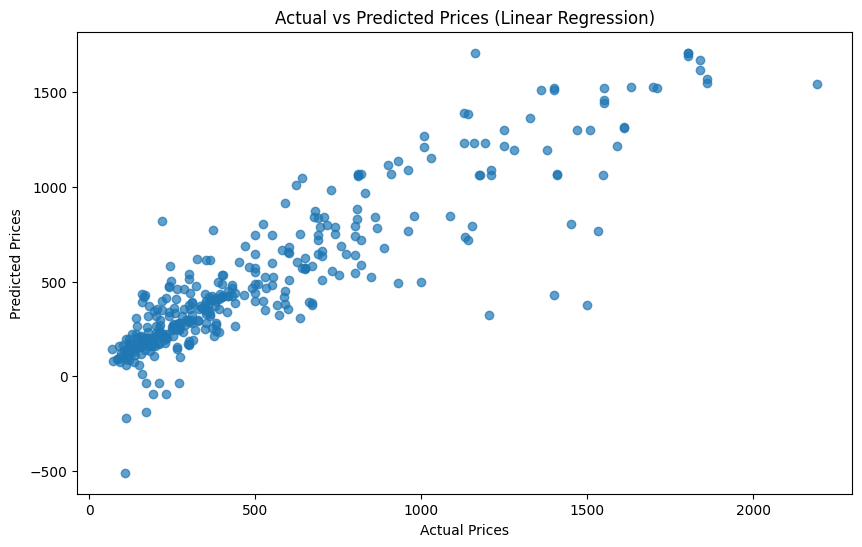

In [18]:

import matplotlib.pyplot as plt

# Plot predicted vs actual prices for the best model
best_model_name = max(models, key=lambda name: r2_score(y_test, models[name].predict(X_test)))
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Actual vs Predicted Prices ({best_model_name})')
plt.show()

1.Close Alignment: Many points are closely aligned with the diagonal line, indicating that for many instances, the actual and predicted prices are very similar, showcasing good model performance.

2.Moderate Spread: There’s a moderate spread of points around the diagonal, suggesting that while predictions are generally good, there are instances with noticeable errors. The spread might increase with the actual price value, indicating higher variance in predictions for higher prices.

3.Outliers: There are a few points far from the diagonal indicate significant prediction errors. These outliers could be due to unusual properties in those specific data points or limitations in the model's ability to generalize.

# Final Report: SMART PHONES PRICE PREDICTION WITH DATA SCIENCE

## Introduction
The aim of this project was to predict smart phone prices using a Smartphone dataset. Analyzed the data, implemented machine learning models, and identified the most significant factors influencing price. This report summarizes the final findings and results.

## Data Analysis
In the exploratory data analysis (EDA) phase,explored various Phone Brands, Storage and RAM. I identified that RAM and Storage play a very important role in the pricing of the Phone.They both have a positive corelation with the Final Price of the phone.

## Model Selection
Using a  combination of Linear Regression, Random Forest Regressor, Decision Tree Regressor, and Support Vector Regressor to identify the most important features for predicting phone prices.

## Model Performance
We evaluated multiple machine learning models to predict customer churn. Below is a summary of our results:

- **Linear Regression on Important Features**: This model achieved an accuracy of 80.6% on the test set, outperforming the Random Forest  with an accuracy of data (79%).

## Conclusion
Our final findings indicate that the Linear Regression is the most reliable model for predicting Phone Prices, providing consistent results across different datasets. The Random Forest when trained on key features, also performed well, reaching an accuracy of 79%.

These results suggest that focusing on important features, can lead to better model performance. Furthermore, the significant features identified during our analysis provide actionable insights for business strategies aimed at increasing their Return On Investment (ROI).

